## Chapter 9: plotting and visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
# %matplotlib inline

Realizar visualizaciones informativas (gráficos) es una de las tareas más importantes en el análisis de datos. Puede ser parte del proceso
explotatorio, por ejemplo, para ayudar a identificar valores atípicos o transformaciones de datos necesarios, o como una forma de generar ideas
para modelos.

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

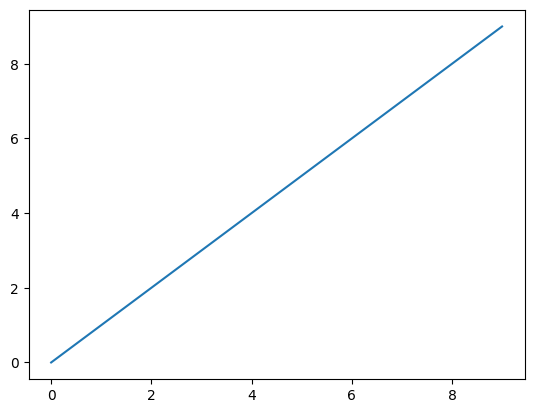

In [3]:
plt.plot(data);

### Figuras y subplots

Los gráficos en matplotlib residen dentro de un objeto `Figure`. Puede crear nuevas figuras con `plt.figure`:

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

En IPython, si corre por primera vez `%matplotlib` para configurar la integración de matplotlib, aparecerá una ventana de trazado vacía, pero
en Jupyter no se motrará nda hasta que usemos algunos comandos más.

`plt.figure` tiene una serie de opciones; en particular, `figsize` garantizará que la figura tenga cierto tamaño y relación de aspecto si se guarda
en el disco.

Puede hacer un trazado con una figura en blanco. Tiene que crear uno o más `subplots` usand `add_subplot`:

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

Esto significa que la cifra debe ser de 2 x 2 (hasta cuatro parcelas en total, y weisre seleccionara la primera de las cuatros subplots (numeradas
de uno 1).

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Ejecutar los comandos en una misma celda:

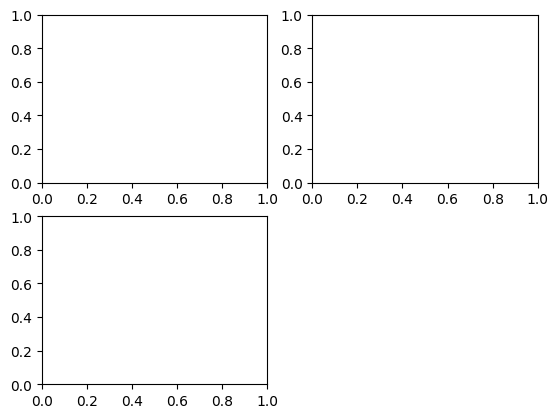

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Ejemplo, hacer un trazado de línea con el método `plot`:

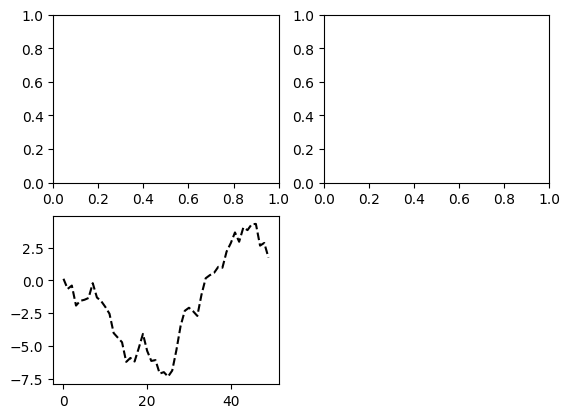

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed"); # el punto y coma suprime la línea de salida

Las opciones adicionales instruyen a matplotlib para trazar una línea discontinua negra. Los objetos devueltos por `fig.add_subplot` son
`AxesSubplot`, en los que puede trazar directamente en los otros subplots vacías llamando el método de instancia de cada una:

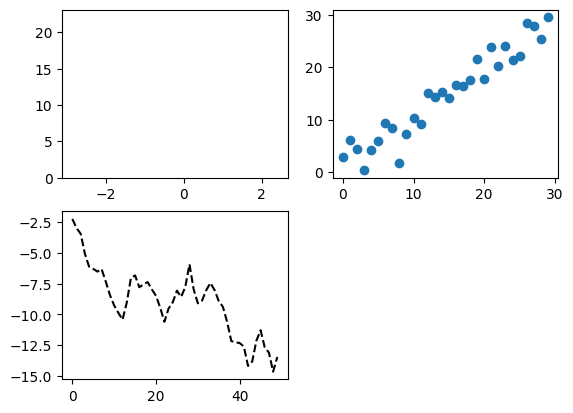

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), color="black", alpha=0);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");

La opción de estilo `alpha=0.3` establece la transparencia de trazado superpuesta.

Para hacer que la creación de una cuadrícula de subplot sea más conveniente, matplotlib incluye un método `plt.subplots` que crea una nueva
figura y devuelve una matriz NumPy que contiene los objetos de subplots creados:

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

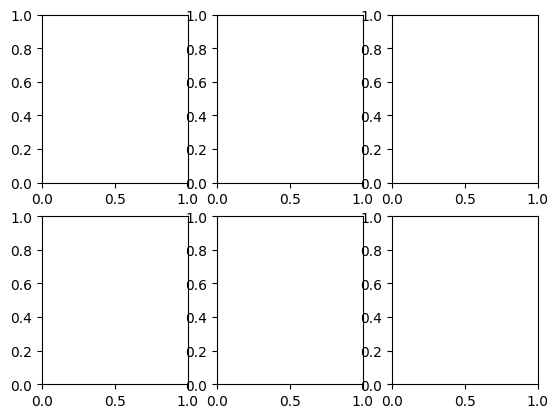

In [13]:
fix, axes = plt.subplots(2, 3)
axes

La matriz `axes` se puede indexar como una matriz bidimensional; por ejemplo, `axes[0, 1]` se refiere al subplot en la fila superior en el centro.
También puede indicar que los subplots deben tener el mismo eje x o y usando `sharex` y `sharey`, respectivamente. Esto puede ser útil cuando
compara datos en la misma escala; de lo contrario, usará los límites de plot de autoescala de forma independiente.

### Ajustar el espacio alrededor de los subplots
Por defecto, matplotlib deja una cierta cantidad de relleno alrededor del exterior de los subplots y en el interior de los subplots. Este espacio
se especifica en la relación con la altura y el ancho de la gráfica, de modo que si cambia el tamaño de la gráfica de forma prográmatica o manual
utilizando la ventana GUI, la trama se ajustará dinámicamente. Puede cambiar el espacio usando el método `subplots_adjust` de `Figure`:

```py
subplots_adjust(left=None, bottom=None, right=None,
    top=None, wspace=None, hspace=None)
```

`wspace` y `hspace` controla el porcentaje del ancho y el alto de la figura. Ejemplo donde reduce el espacio hasta cero:

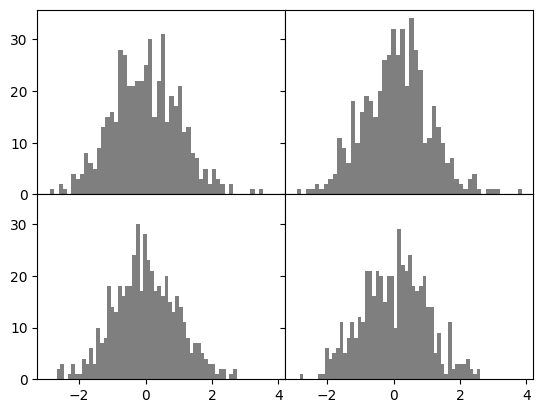

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                       color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

Puede notar que las etiquetas de los ejes se superponen. matplotlib no verifica si las etiquetas se superponen, y, entonces, en un caso como este,
debería areglas las etiquetas usted mismo especificando ubicaciones de marca explícitas y etiquetas de marca

### Colores, marcadores y estilos de línea
La función de línea de matplotlib `plot` acepta matrices de coordenadas x e y y opciones de estilo de colores opcionales. Por ejemplo, para trazar
`x` versus `y` con guiones verdes, ejecutaría:

```py
ax.plot(x, y, linestyle="--", color="green")
```

Se proporcionar varios nombres de colores para los colores utilizados habitualmente, pero puede utilizar cualquier color del espectro especificando su código
hexadecimal (p. ej., `"#CECECE"`).

Los gráficos de líneas también pueden tener marcadores para resaltar los puntos de datos reales. Dado que la función de matplotlib `plot` crea un gráfico
de líneas continuas, interpolando entre puntos, en ocasiones puede no estar claro dónde se encutran los puntos. El marcador se puede suminstrar como
una opción de estilo adicional:

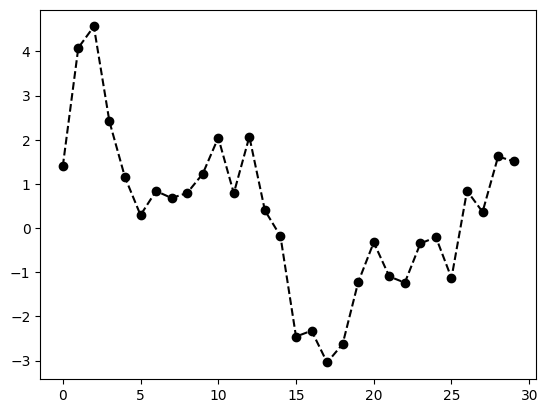

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
       linestyle="dashed", marker="o");

Para los gráficos de líneas, observará que los puntos subsiguientes se interpolan linealmente de forma predeterminado. Esto se puede modificar con la
opción `drawstyle`:

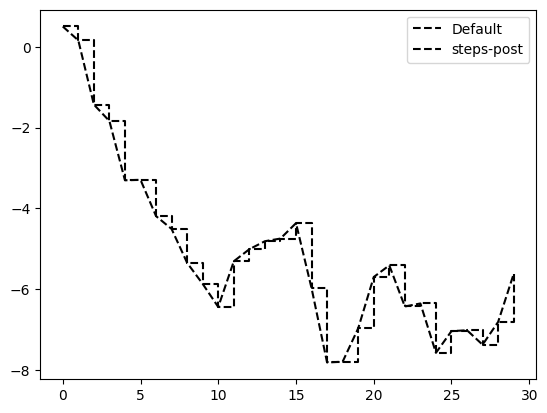

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
# same
# fig, ax = plt.subplots()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
       drawstyle="steps-post", label="steps-post");
ax.legend();

Aquí, dado que le pasamos los `label` argumentos a `plot`, podemos crear una leyenda de la trama para identificar cada línea usando `ax.legend`.

### Ticks, etiquetas y leyendas
Se puede acceder a la mayoría de los tipos de decoreaciones de gráficos a través de métodos en objetos de ejes matplotlib. Esto incluye métodos como
`xlim`, `xticks` y `xticklabels`. Esto controla el rango de trazado, las ubicaciones de las marcas y las etiquetas de las marcas, respectivamente.
Se pueden utilizar de dos maneras:
- Llamado sin argumetnos devuelve el valor del parámetro actual (p. ej., `ax.xlim()` devuelve el rango de trazado actual del eje x).
- Llamado con parámetos establece el valor de parámetro (p. ej., `ax.xlim[0, 10]` establece el rango del eje x de 0 a 10).

Todos estos métodos actúan sobre los activos o los creados más recientemente `AxesSubplot`. Cada uno corresponde a dos métodos en el propio
objeto de la subtrama; en el caso de `xlim`, estos son `ax.get_xlim` y `ax.set_xlim`.

### Configuración del título, etiquetas de eje, ticks y etiquetas de ticks
Ejemplo:

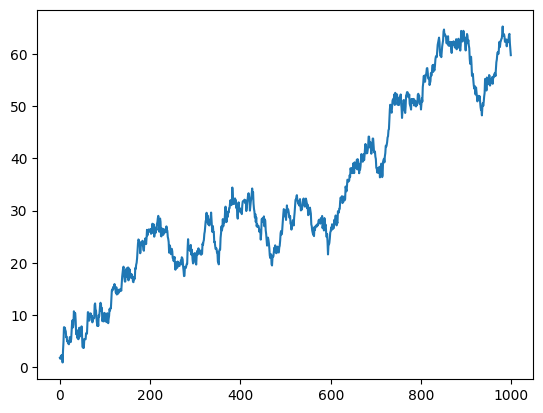

In [31]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

Para cambiar los ticks del eje x, es más fácil usar `set_xticks` y `set_xticklabels`. El primero indica a matplotlib dónde colocar las marcas a lo largo
del rango de datos; de forma predeterminada, estas ubicaciones también serán las etiquetas. Pero podemos establecer cualquier otro valor como etiquetas
usando `set_xticklabels`:

In [32]:
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)

La opción `rotation` establece las etiquetas de marca x en una rotación de 30 grados Por último, `set_title` es el título de la trama secundaria:

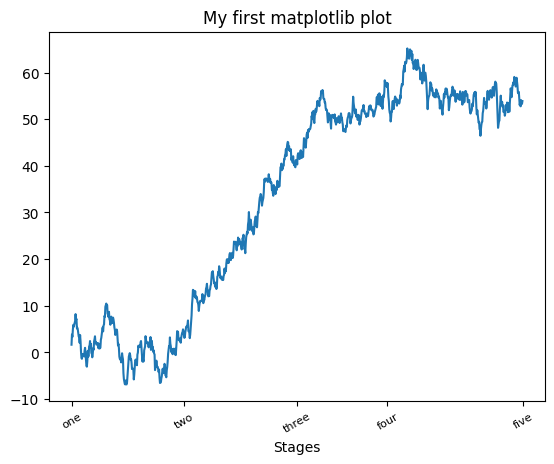

In [50]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set_xlabel("Stages")
#ax.text(0.5, 0, 'Stages')
ax.set_title("My first matplotlib plot");

Modificar el eje y consiste en el mismo proceso, sustituyendo `y` en `x`. La clase de ejes tiene un método `set` que permite la configuración por lotes de
propiedades de trazado. Del ejemplo anterior, también podríamos hacer escrito:

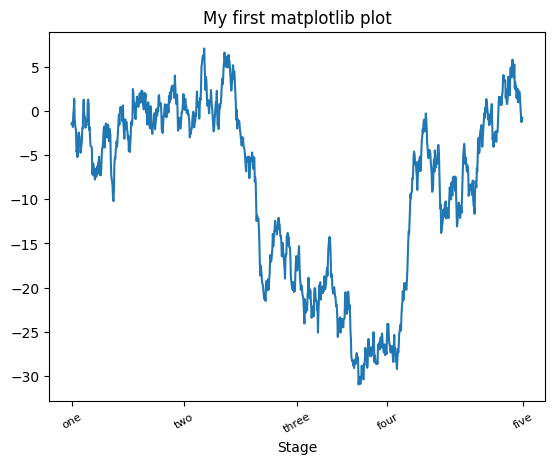

In [52]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set(title="My first matplotlib plot", xlabel="Stage");

### Agregar leyendas
Las leyendas son otro elemento crítico para identificar los elementos de la trama. Hay un par de formar de agregar uno. Lo más fácil es pasar el
arguemento `label` al agregar cada parte de la trama:

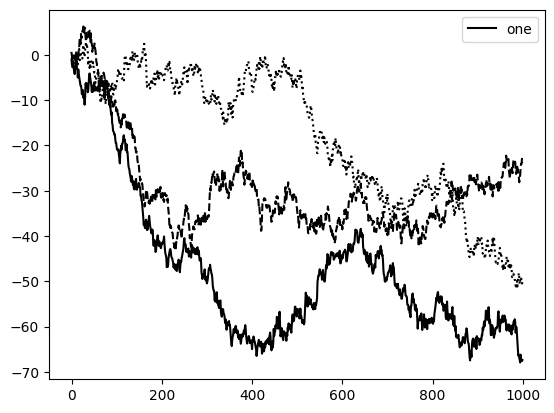

In [55]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted");
ax.legend();

El método `legend` tienen varias otras opciones para el argumento `loc` de ubicación.

La opción `loc` de leyenda le dice a matplotlib dónde colocar el gráfico. El valor predeterminado es `"best"`, que intenta elegir una ubicación
que esté más alejada. Para excluir uno o más elementos de la leyenda, no pase ninguna etiqueta o `label="_lolegend_`.

### Anotaciones y dibujo en una trama secundaria
Además de los tipos de trazado estándar, es posible que desee dibujar sus propias anotaciones de trazado, que puede consistir en texto, flechas u
otras formas. Puede agregar anotaciones y texto usando la función `text`, `arrow` y `annotate`. `text` dibuja texto en coordenadas dadas `(x, y)`
en el gráfico con un estilo personalizado opcional:

```py
ax.text(x, y, "Hello world!", family="monospace", fontsize=10)
```

Las anotaciones pueden dibujar tanto texto como flechas dispuestas adecuadamente.

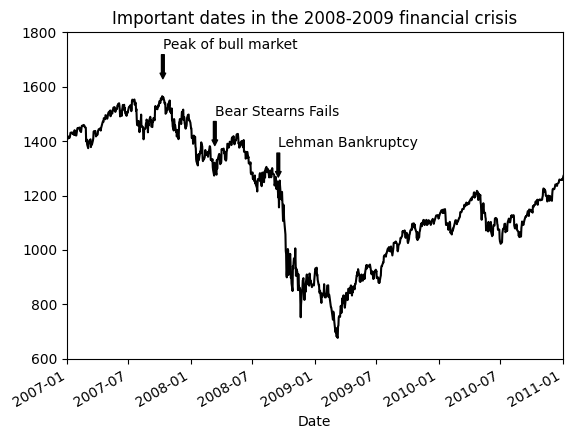

In [68]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
             arrowprops=dict(facecolor="black", headwidth=4, width=2,
                            headlength=4),
             horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis");

Para agregar una forma a una gráfica, cree el objeto de parche y agréguelo a una subtrama `ax` pasando el parche a `ax.add.patch`:

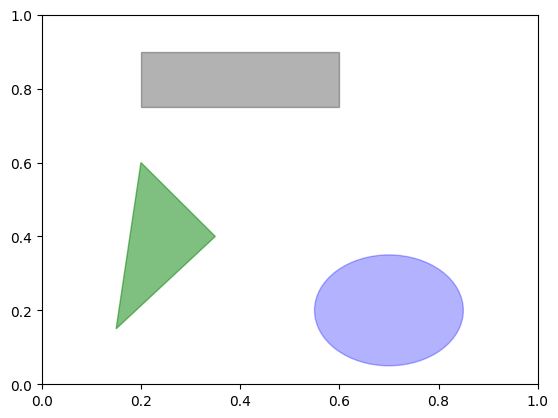

In [70]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

### Guardar trazos en un archivo
Puede guardar la figura activa en un archivo utilizando el método `savefig` de instancia del objeto de figura. Por ejemplo, para guardar
una versión SVG de una figura:

```py
fig.savefig("figpath.svg")
```

El tipo de archivo se infiere de la extensión del archivo. Entonces, si lo usaras en `.pdf` en su lugar, obtendrías un PDF. Una opción importante
para publicar gráficos es `dpi`, que controla la resolución de puntos por pulgadas. Para obtener el mismo trazado que un PNG a 400 DPI:

```py
fig.savefig("figpath.png", dpi=400)
```